In [4]:
import torch
import math

In [5]:
import gpytorch
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
class GP(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(GP, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.RBFKernel(param_transform=torch.exp)
        
    def forward(self, x):
        mean = self.mean_module(x)
        covar = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean, covar)

In [43]:
train_y = torch.tensor([0, -2.5, -3.]) * 0.5
train_x = torch.tensor([-4, -3, -1.])
likelihood = gpytorch.likelihoods.GaussianLikelihood(param_transform=torch.exp)
model = GP(train_x, train_y, likelihood)
model.covar_module.raw_lengthscale.data.fill_(.5)
likelihood.noise_covar.raw_noise.data.fill_(-5)

tensor([-5.])

In [44]:
test_x = torch.linspace(-5, 0, 501)
model.eval()
output = model(test_x)
samples = output.sample(torch.Size((25,)))
lower, upper = output.confidence_region()

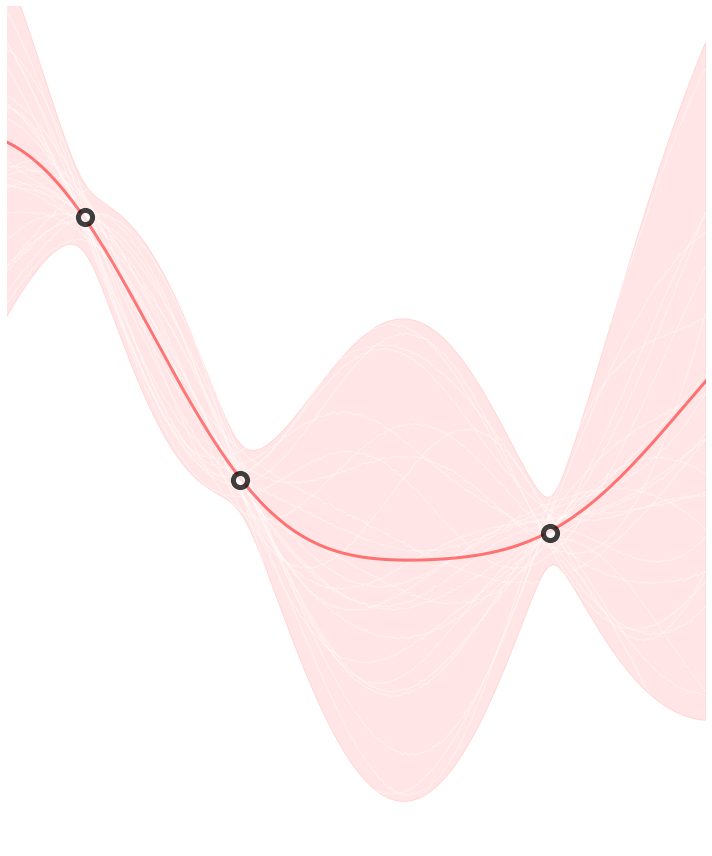

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(10, 12))
ax.fill_between(test_x.detach().numpy(), lower.detach().numpy(), upper.detach().numpy(), color='red', alpha=0.1)
ax.plot(test_x.detach().numpy(), samples.detach().numpy().T, color='white', linewidth=1, alpha=0.5)
ax.plot(test_x.detach().numpy(), output.mean.detach().numpy(), color='red', linewidth=3, alpha=0.5)
ax.scatter(train_x.detach().numpy(), train_y.detach().numpy(), marker='o', color='white',
           edgecolor='black', s=200, zorder=10, linewidth=5, alpha=0.75)

ax.set_ylim([-3, 1])
ax.set_xlim([-4.5, 0])
ax.set_axis_off()
fig.tight_layout()

In [54]:
fig.savefig('classification.pdf', transparent=True)

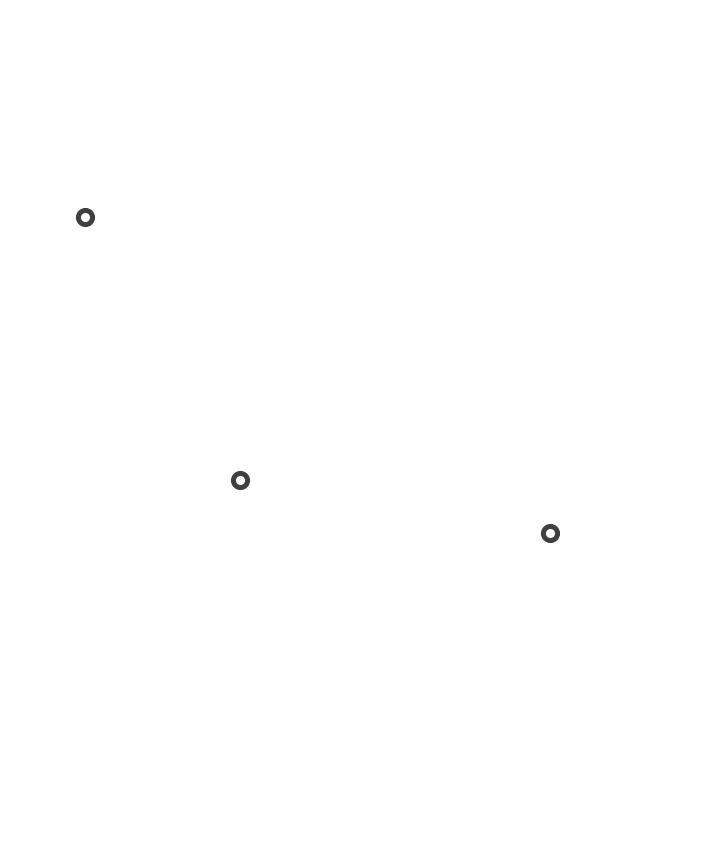

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(10, 12))
# ax.fill_between(test_x.detach().numpy(), lower.detach().numpy(), upper.detach().numpy(), color='red', alpha=0.1)
# ax.plot(test_x.detach().numpy(), samples.detach().numpy().T, color='white', linewidth=1, alpha=0.5)
# ax.plot(test_x.detach().numpy(), output.mean.detach().numpy(), color='red', linewidth=3, alpha=0.5)
ax.scatter(train_x.detach().numpy(), train_y.detach().numpy(), marker='o', color='white',
           edgecolor='black', s=200, zorder=10, linewidth=5, alpha=0.75)

ax.set_ylim([-3, 1])
ax.set_xlim([-4.5, 0])
ax.set_axis_off()
fig.tight_layout()

In [56]:
fig.savefig('dots.pdf', transparent=True)